This is a minimal tutorial for our lab. We only include basic functions, and functions that we will use in our lab. If you are interested in more operations of tensors and pytorch's design concept, see their [official tutorial](https://pytorch.org/tutorials/beginner/introyt.html)

In [ ]:
import torch

## Tensor
A tensor is a basic computing object/unit in pytorch.   
It can be a scalar, a vector, or a matrix.

## Constructing a tensor

In [ ]:
# construct a tensor with random number between 0 and 1
tensor_a = torch.rand(2,5) # this will create a tensor/matrix with shape 2*5
tensor_b = torch.rand(5,2)

print(tensor_a, tensor_b)
print(tensor_a.shape, tensor_b.shape) #.shape tell you the shape of the tensor

tensor([[0.9373, 0.3090, 0.1375, 0.7567, 0.6141],
        [0.2653, 0.0401, 0.8942, 0.0110, 0.5722]]) tensor([[0.8675, 0.6378],
        [0.8927, 0.6534],
        [0.6878, 0.1671],
        [0.9499, 0.5498],
        [0.0604, 0.2516]])
torch.Size([2, 5]) torch.Size([5, 2])


In [ ]:
# construct a tensor with all zeros
tensor_a = torch.zeros(2,5)
# construct a tensor with all ones
tensor_b = torch.ones(2,5)

tensor_a, tensor_b

(tensor([[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]),
 tensor([[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]))

In [ ]:
# construct a tensor from list
numbert_list = [[1, 2, 3],
                [4, 5, 6]]
tensor_a = torch.tensor(numbert_list)

tensor_a

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
# a tensor can have different data types, you can manually cast it to different data types with ".to"
# the default data type is float32
tensor_a = torch.rand(2,5)
print(tensor_a)
tensor_a = tensor_a.to(torch.float64)
print(tensor_a)
tensor_a = tensor_a.to(torch.int8)
print(tensor_a)
# you can also use ".to" to move tensor to another device ('cuda', 'cpu')
tensor_a = tensor_a.to('cpu') # modify this to 'cuda' if gpu is available
print(tensor_a)

tensor([[0.4409, 0.9027, 0.4531, 0.1243, 0.6703],
        [0.2522, 0.1012, 0.0321, 0.5525, 0.9834]])
tensor([[0.4409, 0.9027, 0.4531, 0.1243, 0.6703],
        [0.2522, 0.1012, 0.0321, 0.5525, 0.9834]], dtype=torch.float64)
tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int8)
tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int8)


In [ ]:
# you can also get scalar/list from a tensor
tensor_a = torch.rand(2,5)
print(tensor_a)
# get scalar with ".item()"
print(tensor_a[0, 0].item())
# get list with ".tolist()"
print(tensor_a[0].tolist())

tensor([[0.5955, 0.4308, 0.8631, 0.5430, 0.7761],
        [0.6568, 0.9547, 0.3695, 0.4869, 0.0106]])
0.595450758934021
[0.595450758934021, 0.4307849407196045, 0.8630664348602295, 0.5430251955986023, 0.7760964035987854]


In [ ]:
# construct a tensor with given shape and filled with a given number
full_matrix = torch.full((2,3),42) # number: 42, shape: 5*5

full_matrix

tensor([[42, 42, 42],
        [42, 42, 42]])

## Matrix multiplication

[torch.matmul](https://pytorch.org/docs/stable/generated/torch.matmul.html)

In [ ]:
a = [[1, 1],
     [2, 3]]
b = [[1, 2],
     [3, 3]]
tensor_a = torch.tensor(a)
tensor_b = torch.tensor(b)
print(torch.matmul(tensor_a,tensor_b))

tensor([[ 4,  5],
        [11, 13]])


## Outer product
compute outer product between two vectors
[torch.outer](https://pytorch.org/docs/stable/generated/torch.outer.html)

In [ ]:
tensor_c = torch.arange(1,5)
tensor_d = torch.arange(3,7)

out_product = torch.outer(tensor_c,tensor_d)

tensor_c, tensor_d, out_product

(tensor([1, 2, 3, 4]),
 tensor([3, 4, 5, 6]),
 tensor([[ 3,  4,  5,  6],
         [ 6,  8, 10, 12],
         [ 9, 12, 15, 18],
         [12, 16, 20, 24]]))

## Filter out the upper triangle of one matrix

[torch.triu](https://pytorch.org/docs/stable/generated/torch.triu.html)

In [ ]:
original_matrix = torch.rand(5,5)
print(original_matrix)

upper_triangle = torch.triu(original_matrix)
print(upper_triangle)

tensor([[0.3192, 0.8642, 0.3561, 0.0563, 0.1519],
        [0.9537, 0.6780, 0.8652, 0.3633, 0.8234],
        [0.8722, 0.5278, 0.7727, 0.5351, 0.8725],
        [0.1473, 0.7386, 0.3058, 0.8142, 0.9745],
        [0.3584, 0.1251, 0.0987, 0.4501, 0.5776]])
tensor([[0.3192, 0.8642, 0.3561, 0.0563, 0.1519],
        [0.0000, 0.6780, 0.8652, 0.3633, 0.8234],
        [0.0000, 0.0000, 0.7727, 0.5351, 0.8725],
        [0.0000, 0.0000, 0.0000, 0.8142, 0.9745],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.5776]])


## Softmax

Softmax is calculated by

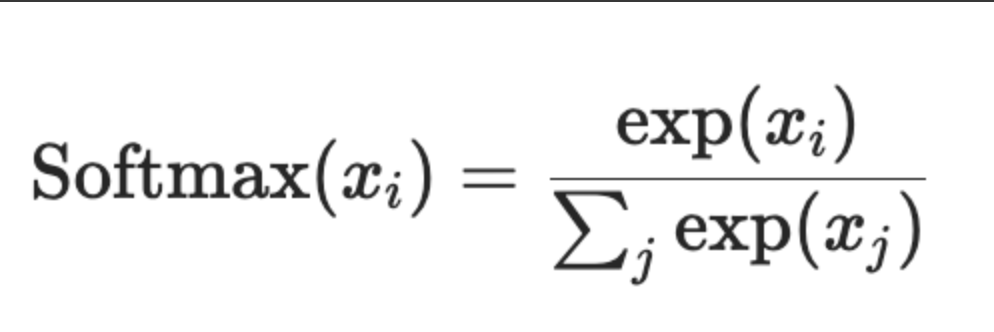

This returns the value proportioned to the sum of value along a given dimension.

Simply put, the process is given as followed:

1. Take exponential for each element in the matrix.
2. Sum the exponential value along the given dimension.
3. Divide the first step by the second step with their corresponding dimension.

In [ ]:
# Let's demonstrate how we derive softmax manually
# Here, we calculate sofatmax in the first row
Row = upper_triangle[0]
Sum_of_this_row = torch.sum(torch.exp(Row))
print("Sum of exponentials of the first row: ", Sum_of_this_row)
for i in range(upper_triangle.size(1)):
  print(f"original value: {Row[i]}")
  print(f"exponential value: {torch.exp(Row[i])}")
  print(f"elements divided by sum of exponentials: {torch.exp(Row[i])/Sum_of_this_row}")


## Softmax
softmax_1 = torch.nn.functional.softmax(upper_triangle,dim=1)
print(softmax_1) # you can see the first row is the same as we do manually

Sum of exponentials of the first row:  tensor(7.3988)
original value: 0.3192439079284668
exponential value: 1.376086950302124
elements divided by sum of exponentials: 0.1859872043132782
original value: 0.8641807436943054
exponential value: 2.373061180114746
elements divided by sum of exponentials: 0.32073482871055603
original value: 0.35612785816192627
exponential value: 1.4277900457382202
elements divided by sum of exponentials: 0.1929752230644226
original value: 0.05626475811004639
exponential value: 1.057877779006958
elements divided by sum of exponentials: 0.14297914505004883
original value: 0.15187054872512817
exponential value: 1.1640095710754395
elements divided by sum of exponentials: 0.15732355415821075
tensor([[0.1860, 0.3207, 0.1930, 0.1430, 0.1573],
        [0.1104, 0.2174, 0.2621, 0.1587, 0.2514],
        [0.1210, 0.1210, 0.2620, 0.2066, 0.2895],
        [0.1265, 0.1265, 0.1265, 0.2855, 0.3351],
        [0.1730, 0.1730, 0.1730, 0.1730, 0.3082]])


In [ ]:
# softmax over columns instead of rows
softmax_2 = torch.nn.functional.softmax(upper_triangle,dim=0)
print(softmax_2)

tensor([[0.2560, 0.3232, 0.1792, 0.1418, 0.1134],
        [0.1860, 0.2683, 0.2981, 0.1927, 0.2219],
        [0.1860, 0.1362, 0.2718, 0.2289, 0.2331],
        [0.1860, 0.1362, 0.1255, 0.3026, 0.2581],
        [0.1860, 0.1362, 0.1255, 0.1340, 0.1735]])


In [ ]:
## Use this helper function to inspect what internally a softmax do.
import torch
import torch.nn.functional as F
def manual_softmax_dim0(x):
    # Step 1: Compute the exponential of each element
    exp_x = torch.exp(x)

    # Step 2: Compute the sum of exponentials along dimension 0
    sum_exp_x = torch.sum(exp_x, dim=0, keepdim=True)

    # Step 3: Divide each exponential by the sum
    softmax_x = exp_x / sum_exp_x

    return softmax_x

# Calculate softmax manually
# manual_result = manual_softmax_dim0(upper_triangle)

# # Calculate softmax using PyTorch's built-in function
# torch_result = F.softmax(upper_triangle, dim=0)

# print("Manual Softmax result:")
# print(manual_result)
# print("\nPyTorch Softmax result:")
# print(torch_result)

# # Verify that the results are the same
# print("\nAre the results equal?", torch.allclose(manual_result, torch_result))

## Reshape tensor

[torch.view](https://pytorch.org/docs/stable/generated/torch.Tensor.view.html)

or

[torch.reshape](https://pytorch.org/docs/stable/generated/torch.reshape.html)

These 2 functions produces the same result. torch.view performs quicker as it does not allocate new memory; torch.reshape runs slightly slower because it will allocate new memories if needed.

For details, please refer to [this blog](https://myscale.com/blog/torch-reshape-vs-torch-view-pytorch/)

Pratically, torch.reshape is recommanded as it can handle more cases. We guaranteed that all tensors are contiguous in our lab so we will use torch.view to decrease computation time.

In [ ]:
before_reshaped = torch.randn((2,5))
print(before_reshaped)

after_reshaped = before_reshaped.reshape(5,2)
after_viewed = before_reshaped.view(5,2)

print(after_reshaped)
print(after_viewed)

tensor([[-1.1768, -0.0658,  1.2120,  0.4447, -0.7296],
        [ 3.1051,  0.5898, -0.3323, -0.3089,  0.4202]])
tensor([[-1.1768, -0.0658],
        [ 1.2120,  0.4447],
        [-0.7296,  3.1051],
        [ 0.5898, -0.3323],
        [-0.3089,  0.4202]])
tensor([[-1.1768, -0.0658],
        [ 1.2120,  0.4447],
        [-0.7296,  3.1051],
        [ 0.5898, -0.3323],
        [-0.3089,  0.4202]])


## Get the index of max value

[torch.argmax](https://pytorch.org/docs/stable/generated/torch.argmax.html)

Argument max returns the "index" of the max value, in contrast of max, which directly returns the max value.

(This can also be achieved my selecting indices of torch.max, but will be slightly slower.)

In [ ]:
matrix = torch.randn(2,3)
print(matrix)

max_value=torch.max(matrix,dim=1).values
max_index=torch.argmax(matrix,dim=1)
print(max_value)
print(max_index)

tensor([[ 0.6662, -1.0637, -1.6986],
        [ 1.0759,  1.2133,  0.4335]])
tensor([0.6662, 1.2133])
tensor([0, 1])
